### <font color='blue'> MTH9898 HW1

by: Chao Zhu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib as mpl
import tabulate as tab
%matplotlib inline
mpl.rcParams['lines.linewidth'] = 2
def generate_data(num_rows, num_features, true_betas , sigma_2 = 1, seed = None): 
    '''
    Args :
    num_rows ( int ): The number of sample rows of data
    num_features ( int ): The number of features
    true_betas (array): The true beta values used to generate y 
    sigma_2 ( float ): The multiplier for the random noise
    '''
    if seed:
        np.random.seed(seed)
    X = np.random.randn(num_rows, num_features)
    Y = X.dot(true_betas) + np.random.randn(num_rows)*sigma_2
    return X,Y
def get_dataset (set_num ): 
    if set_num == 1:
        return generate_data(1000, 2, np.array([1 ,1]))
    elif set_num == 2:
        return generate_data(50, 2, np.array([1 ,0])); 
    elif set_num == 3:
        return generate_data(250, 2, np.array([1 ,0])); 
    elif set_num == 4:
        return generate_data(10000, 2, np.array([1 ,0])); 
    assert 'Shouldn ’ t be here'

<font color = "red"> For dataset 4 I can't calculate ridge regression for 100000 so I changed it to 10000.  </font>

In [2]:
def my_inv(x):
    if len(x.shape) == 1:
        return 1/x
    else:
        return np.linalg.inv(x)
def simple_regression(X_in,Y_in):
    num_indep = X_in.shape[1]
    t1 = my_inv(X_in.T.dot(X_in)).dot(X_in.T)
    beta=t1.dot(Y_in)
    return(beta)
def problem_1():
    res=[['dataset']+['mu_0']+['mu_1']+['var_0']+['var_1']]
    for i in range(4):
        beta_0=[]
        beta_1=[]
        for j in range(1000):
            A=get_dataset(i+1)
            num_indep=A[0].shape[1]
            beta=simple_regression(A[0],A[1])
            beta_0.append(beta[0])
            beta_1.append(beta[1])
        res.append([i+1]+[np.mean(beta_0)]+[np.mean(beta_1)]+[np.var(beta_1)]+[np.var(beta_1)])    
        plt.figure()
        plt.title('histogram of beta_{1} values of datasets_{0}'.format(i+1,0))
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.hist(beta_0)
        plt.figure()
        plt.title('histogram of beta_{1} values of datasets_{0}'.format(i+1,1))
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.hist(beta_1)
    z=(tab.tabulate(res, headers='firstrow', numalign='right', stralign='right', tablefmt='grid', floatfmt='.4f')) 
    print(z)

+-----------+--------+---------+---------+---------+
|   dataset |   mu_0 |    mu_1 |   var_0 |   var_1 |
+===========+========+=========+=========+=========+
|         1 | 0.9976 |  0.9993 |  0.0010 |  0.0010 |
+-----------+--------+---------+---------+---------+
|         2 | 0.9985 |  0.0044 |  0.0213 |  0.0213 |
+-----------+--------+---------+---------+---------+
|         3 | 0.9976 | -0.0015 |  0.0039 |  0.0039 |
+-----------+--------+---------+---------+---------+
|         4 | 1.0001 | -0.0001 |  0.0000 |  0.0000 |
+-----------+--------+---------+---------+---------+


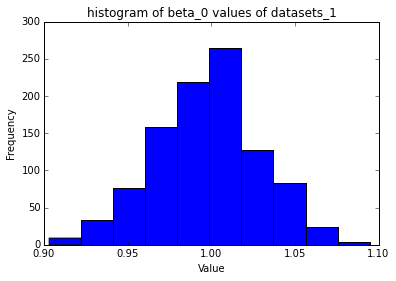

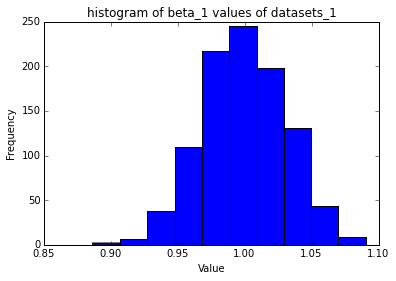

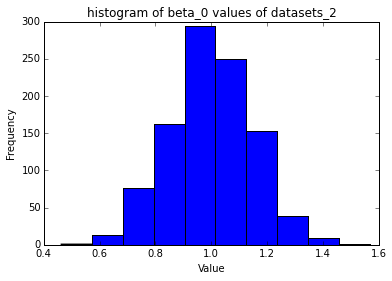

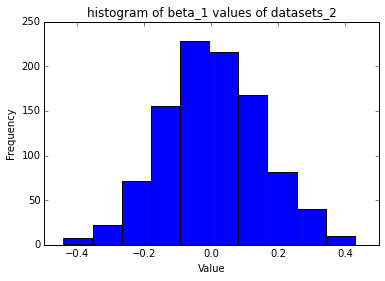

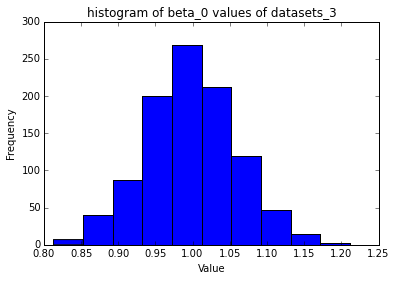

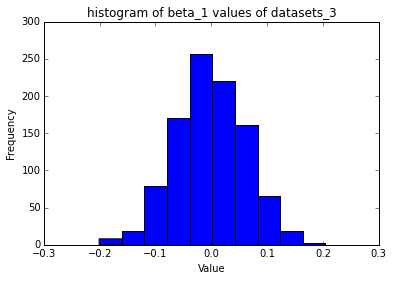

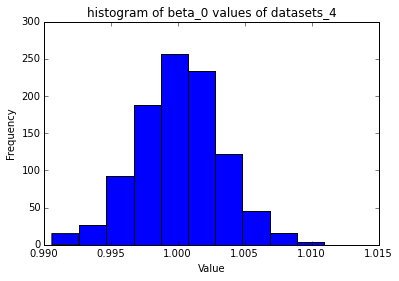

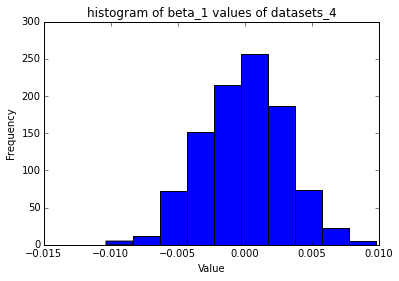

In [30]:
problem_1()

In [3]:
def ridge_regression(X_in,Y_in,lambda_):
    num_indep = X_in.shape[1]
    beta_ridge = (my_inv(X_in.T.dot(X_in)+lambda_* np.eye(num_indep)).dot(X_in.T)).dot(Y_in)
    EDOF=np.trace(X_in.dot(my_inv(X_in.T.dot(X_in)+lambda_* np.eye(num_indep)).dot(X_in.T)))
    return beta_ridge,EDOF

In [10]:
def problem2():
    for i in range(4):
        if i==0:
            lambda_range=np.linspace(1,1500, num=10)
        elif i==1:
            lambda_range=np.linspace(1,150, num=10)
        elif i==2:
            lambda_range=np.linspace(1,400, num=10)
        elif i==3:
            lambda_range=np.linspace(1,20000, num=10)
        beta0_ave=[]
        beta1_ave=[]
        beta0_var=[]
        beta1_var=[]
        EDOF_ave=[]
        for lambda_ in lambda_range:
            beta_0=[]
            beta_1=[]
            EDOF=[]
            for j in range(100):
                A=get_dataset(i+1)
                beta=ridge_regression(A[0],A[1],lambda_)
                beta_0.append(beta[0][0])
                beta_1.append(beta[0][1])
                EDOF.append(beta[1])
            beta0_ave.append(np.mean(beta_0))
            beta1_ave.append(np.mean(beta_1))
            beta0_var.append(np.var(beta_0))
            beta1_var.append(np.var(beta_1))
            EDOF_ave.append(np.mean(EDOF))
        plt.figure()
        plt.title('mu_beta vs Lambda in dataset_{0}'.format(i+1))
        plt.xlabel('Lambda')
        plt.ylabel('mu_Beta')
        plt.gca().set_xscale("log", nonposx='clip')
        plt.plot(lambda_range,beta0_ave, label='beta0')
        plt.plot(lambda_range,beta1_ave, label='beta1')
        plt.legend()
        plt.figure()
        plt.title('var_beta vs Lambda in dataset_{0}'.format(i+1))
        plt.xlabel('Lambda')
        plt.ylabel('var_Beta')
        #plt.gca().set_xscale("log", nonposx='clip')
        plt.plot(lambda_range,beta0_var, label='beta0')
        plt.plot(lambda_range,beta1_var, label='beta1')
        plt.legend()
        
        plt.figure()
        plt.title('EDOFs vs Lambda in dataset_{0}'.format(i+1))
        plt.xlabel('Lambda')
        plt.ylabel('EDOF')
        #plt.gca().set_xscale("log", nonposx='clip')
        plt.plot(lambda_range,EDOF_ave)

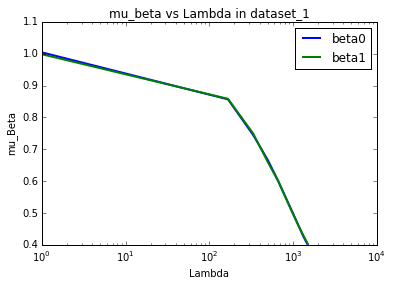

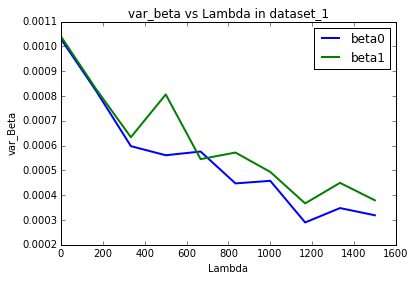

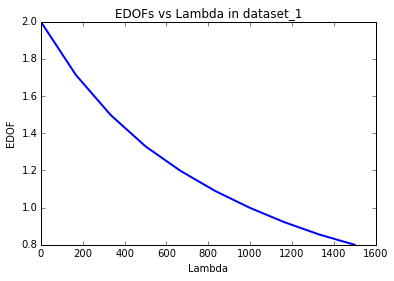

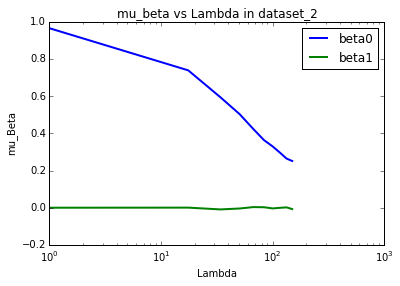

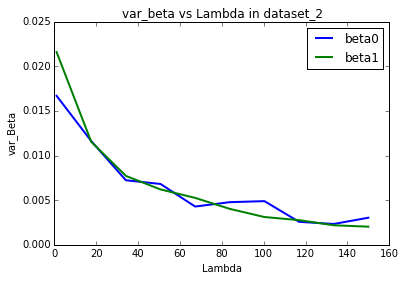

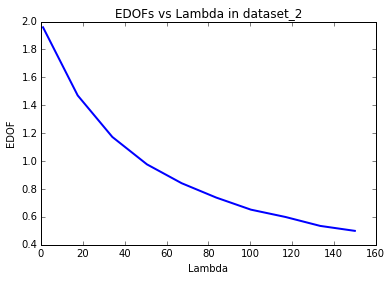

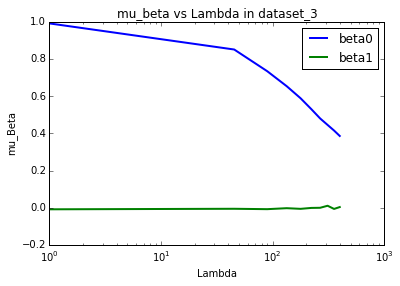

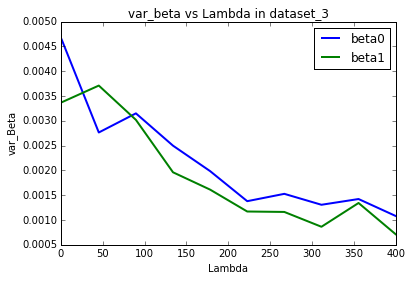

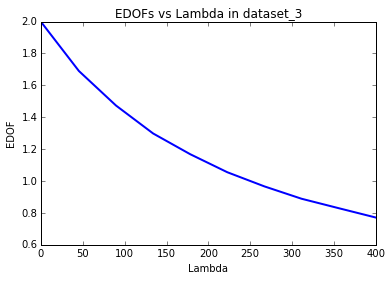

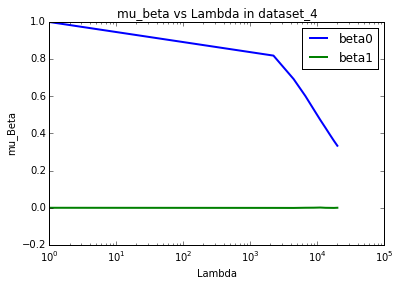

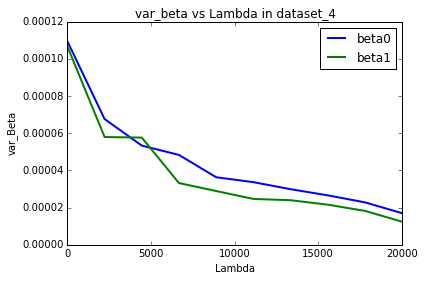

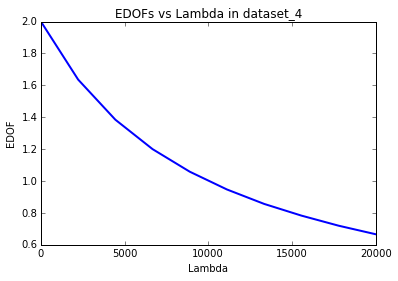

In [11]:
problem2()

In [7]:
def ridge_regression2(X_in,Y_in,lambda_):
    num_indep = X_in.shape[1]
    z = my_inv(X_in.T.dot(X_in) + lambda_ * np.eye(num_indep))
    variance = np.diag(z.dot(X_in.T.dot(X_in)).dot(z))
    return variance

In [8]:
def problem3():
    res=[['data_set']+['lambda_']+['var0']+['var1']]
    for i in range(4):
        if i==0:
            lambda_=100
        elif i==1:
            lambda_=60
        elif i==2:
            lambda_=300
        elif i==3:
            lambda_=10
        var0=[]
        var1=[]
        for j in range(1000):
            A=get_dataset(i+1)
            beta=ridge_regression2(A[0],A[1],lambda_)
            var0.append(beta[0])
            var1.append(beta[0])
        res.append([i+1]+[lambda_]+[np.mean(var0)]+[np.mean(var1)])
    z = (tab.tabulate(res, headers='firstrow', numalign='right', stralign='right', tablefmt='grid', floatfmt='.4f')) 
    print(z)

In [9]:
problem3()

+------------+-----------+--------+--------+
|   data_set |   lambda_ |   var0 |   var1 |
+============+===========+========+========+
|          1 |       100 | 0.0008 | 0.0008 |
+------------+-----------+--------+--------+
|          2 |        60 | 0.0041 | 0.0041 |
+------------+-----------+--------+--------+
|          3 |       300 | 0.0008 | 0.0008 |
+------------+-----------+--------+--------+
|          4 |        10 | 0.0001 | 0.0001 |
+------------+-----------+--------+--------+


If we use the formula in the class:
$$var(\hat{\beta}^R)=\sigma^2(X^T X + \lambda I)^{−1}X^T X(X^T X + \lambda I)^{−1}
$$
Because numpy randn will generate $x_i \sim N(0,1)$.  $X^T X \sim  \left( \begin{array}{ccc}
n & 0  \\
0 & n  \end{array} \right) $, And $\sigma=1$ in this case. Thus $var(\hat{\beta}^R)=\left( \begin{array}{ccc}
\frac{n}{(n+\lambda)^2} & 0  \\
0 & \frac{n}{(n+\lambda)^2} \end{array} \right) $
For example, dataset 1 we have $n=1000,\lambda=100$. Then $var_0=var_1=\frac{1000}{1100^2}=0.0008$ which is right.

dataset 2 we have $n=50,\lambda=60$. Then $var_0=var_1=\frac{50}{110^2}=0.0041$ which is right. 

dataset 3 we have $n=250,\lambda=300$. Then $var_0=var_1=\frac{250}{550^2}=0.0008$ which is right. 

dataset 4 we have $n=10000,\lambda=10$. Then $var_0=var_1=\frac{10000}{10010^2}=0.0001$ which is right. 